In [28]:
#Importamos Libreraías

import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Cargo el DataSet agregandole 'encoding='latin1', delimiter=';'' al final ya que, de no agregarlo, visual no me lo carga.

df = pd.read_csv(r"C:\Users\Christian\OneDrive\Documentos\CoderHouse\Fundamentos para la Ciencia de Datos 1\PreEntrega 1/datos-fallecidos-en-siniestros-de-trnsito-2013-2019.csv", encoding='latin1', delimiter=';')
df

,Fecha y hora,Fecha,Hora,Departamento,Localidad,Jurisdiccion,Tipo de Siniestro,Vehiculo,Rol,Edad,Sexo,Fallecido a los Dias,Otro vehiculo,Lugar del Siniestro,X,Y,Fallecidos
0,01/01/2013 23:15,01/01/2023,23:15:00,CANELONES,N/C,NACIONAL,COLISIàN CON OBSTµCULO EN CALZADA,MOTO,CONDUCTOR,34.0,F,0.0,NaN,RUTA 101 km 24,"589815,34","6143862,76",1
1,01/01/2013 23:35,01/01/2013,23:35:00,SALTO,SALTO,DEPARTAMENTAL,ATROPELLO DE PEATàN,PEATàN,PEATàN,52.0,F,0.0,MOTO,MAGALLANES pr¢x. Barrio Chinchurreta,"411579,77","6526872,77",1
2,03/01/2013 23:35,03/01/2013,23:35:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,34.0,M,8.0,CAMION,RUTA 3 km. 358,"412321,54","6407067,58",1
3,04/01/2013 7:10,04/01/2013,7:10:00,COLONIA,N/C,NACIONAL,DESPISTE,AUTO,CONDUCTOR,49.0,F,1.0,NaN,RUTA 21 esq. Dr Irastorza,"379424,37","6240356,26",1
4,04/01/2013 11:00,04/01/2013,11:00:00,CANELONES,PROGRESO,DEPARTAMENTAL,DESPISTE,AUTO,CONDUCTOR,91.0,M,0.0,NaN,CESAR MAYO GUTIERREZ senda CAMINO PELUFFO,"570675,1","6164479,53",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,29/12/2019 20:24,29/12/2019,20:24:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,23.0,F,0.0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81",1
3474,29/12/2019 20:24,29/12/2019,20:24:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,5.0,M,0.0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81",1
3475,29/12/2019 20:24,29/12/2019,20:24:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,23.0,M,0.0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81",1
3476,29/12/2019 20:24,29/12/2019,20:24:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,CAMIONETA,PASAJERO,60.0,F,27.0,AUTO,"RUTA 24 KM 88,000","405112,07","6404241,81",1


In [3]:
#Verifico columnas existentes
print("Columnas existentes en el DataFrame:")
print(df.columns)

Columnas existentes en el DataFrame:
Index(['Fecha y hora', 'Fecha', 'Hora', 'Departamento', 'Localidad',
       'Jurisdiccion ', 'Tipo de Siniestro', 'Vehiculo', 'Rol', 'Edad', 'Sexo',
       'Fallecido a los Dias', 'Otro vehiculo', 'Lugar del Siniestro', 'X',
       'Y', 'Fallecidos'],
      dtype='object')


In [4]:
#Borro columnas que no me sirven:  'X', 'Y', y 'Jurisdiccion '
df = df.drop(columns=['X', 'Y', 'Jurisdiccion ', 'Lugar del Siniestro'], errors='ignore')
df 

,Fecha y hora,Fecha,Hora,Departamento,Localidad,Tipo de Siniestro,Vehiculo,Rol,Edad,Sexo,Fallecido a los Dias,Otro vehiculo,Fallecidos
0,01/01/2013 23:15,01/01/2023,23:15,CANELONES,N/C,COLISIàN CON OBSTµCULO EN CALZADA,MOTO,CONDUCTOR,34.0,F,0.0,NaN,1
1,01/01/2013 23:35,01/01/2013,23:35,SALTO,SALTO,ATROPELLO DE PEATàN,PEATàN,PEATàN,52.0,F,0.0,MOTO,1
2,03/01/2013 23:35,03/01/2013,23:35,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,34.0,M,8.0,CAMION,1
3,04/01/2013 7:10,04/01/2013,7:10,COLONIA,N/C,DESPISTE,AUTO,CONDUCTOR,49.0,F,1.0,NaN,1
4,04/01/2013 11:00,04/01/2013,11:00,CANELONES,PROGRESO,DESPISTE,AUTO,CONDUCTOR,91.0,M,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,29/12/2019 20:24,29/12/2019,20:24,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,23.0,F,0.0,CAMIONETA,1
3474,29/12/2019 20:24,29/12/2019,20:24,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,5.0,M,0.0,CAMIONETA,1
3475,29/12/2019 20:24,29/12/2019,20:24,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,23.0,M,0.0,CAMIONETA,1
3476,29/12/2019 20:24,29/12/2019,20:24,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,CAMIONETA,PASAJERO,60.0,F,27.0,AUTO,1


In [5]:
# Calculo la suma total de fallecidos
total_fallecidos = df['Fallecidos'].sum()

print(f"La cantidad total de fallecidos es: {total_fallecidos}")

La cantidad total de fallecidos es: 3478


C:\Users\Christian\AppData\Local\Temp\ipykernel_12700\2996521933.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Fallecimientos', y='Departamento', data=df_count, palette='viridis')


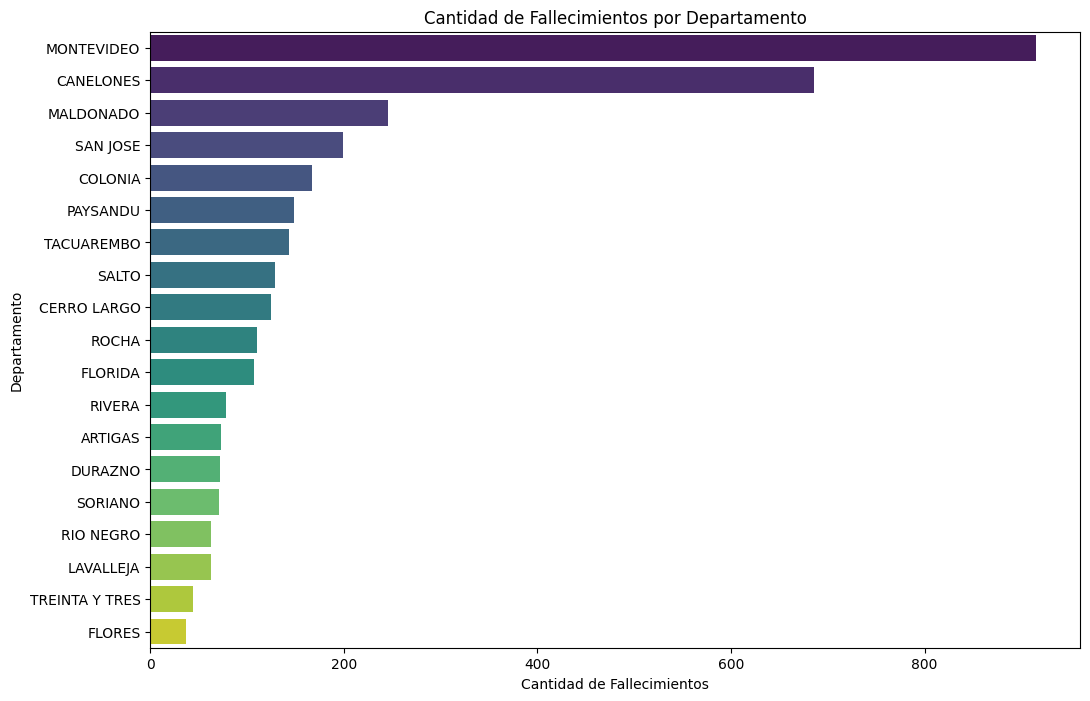

In [6]:
# Calculo la cantidad de fallecimientos por departamento
df_count = df['Departamento'].value_counts().reset_index()
df_count.columns = ['Departamento', 'Cantidad de Fallecimientos']

# Ordeno de forma descendente
df_count = df_count.sort_values(by='Cantidad de Fallecimientos', ascending=False)

# Hago el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='Cantidad de Fallecimientos', y='Departamento', data=df_count, palette='viridis')
plt.title('Cantidad de Fallecimientos por Departamento')
plt.xlabel('Cantidad de Fallecimientos')
plt.ylabel('Departamento')
plt.show()

C:\Users\Christian\AppData\Local\Temp\ipykernel_12700\8992113.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Fallecimientos', y='Vehiculo', data=df_count, palette='viridis')


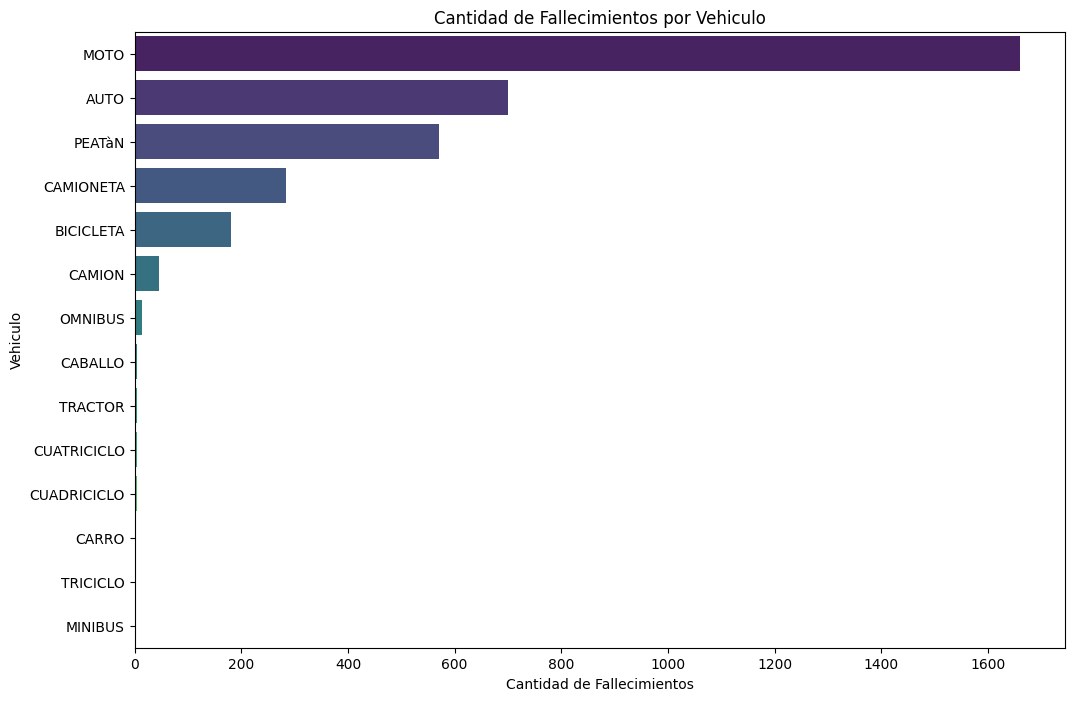

In [7]:
# Calculo la cantidad de fallecimientos pero ahora por vehiculo
df_count = df['Vehiculo'].value_counts().reset_index()
df_count.columns = ['Vehiculo', 'Cantidad de Fallecimientos']

# Ordeno de forma descendente
df_count = df_count.sort_values(by='Cantidad de Fallecimientos', ascending=False)

# Hago el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='Cantidad de Fallecimientos', y='Vehiculo', data=df_count, palette='viridis')
plt.title('Cantidad de Fallecimientos por Vehiculo')
plt.xlabel('Cantidad de Fallecimientos')
plt.ylabel('Vehiculo')
plt.show()

C:\Users\Christian\AppData\Local\Temp\ipykernel_12700\2545850505.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Fallecimientos', y='Tipo de Siniestro', data=df_count, palette='viridis')


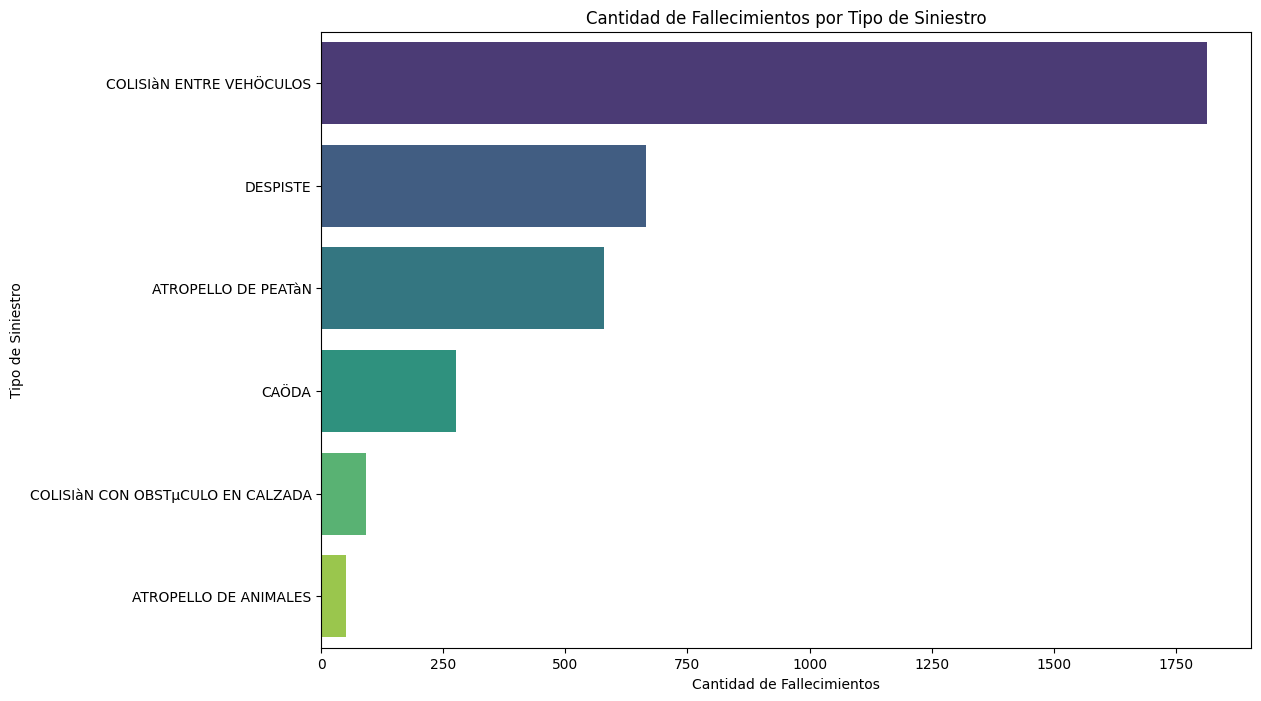

In [8]:
# Calculo la cantidad de fallecimientos por Tipo de Siniestro
df_count = df['Tipo de Siniestro'].value_counts().reset_index()
df_count.columns = ['Tipo de Siniestro', 'Cantidad de Fallecimientos']

# Ordeno de forma descendente
df_count = df_count.sort_values(by='Cantidad de Fallecimientos', ascending=False)

# Hago el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='Cantidad de Fallecimientos', y='Tipo de Siniestro', data=df_count, palette='viridis')
plt.title('Cantidad de Fallecimientos por Tipo de Siniestro')
plt.xlabel('Cantidad de Fallecimientos')
plt.ylabel('Tipo de Siniestro')
plt.show()

In [9]:
# Elimino filas donde 'edad' sea NaN o no sea numérica
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')
df = df.dropna(subset=['Edad'])

# Calculo la edad promedio de los fallecidos
edad_promedio = df['Edad'].mean()

print(f"La edad promedio de los fallecidos es: {edad_promedio:.2f} años")

La edad promedio de los fallecidos es: 43.17 años


C:\Users\Christian\AppData\Local\Temp\ipykernel_12700\2786664665.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Fallecimientos', y='Sexo', data=df_count, palette='viridis')


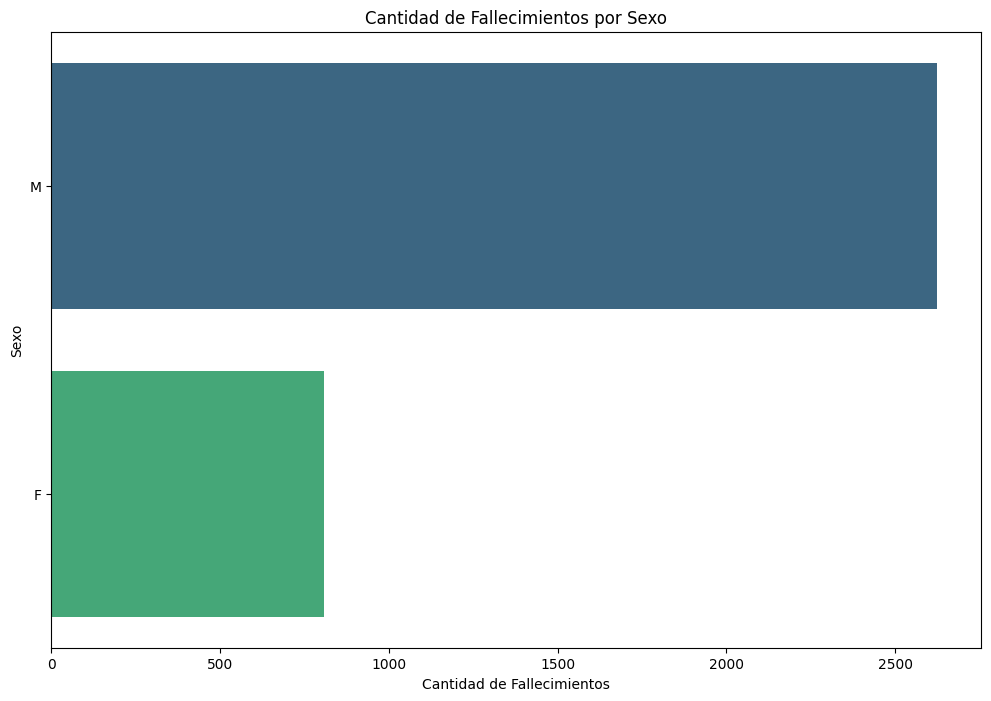

In [11]:
# Calculo la cantidad de fallecimientos por sexo
df_count = df['Sexo'].value_counts().reset_index()
df_count.columns = ['Sexo', 'Cantidad de Fallecimientos']

# Ordeno de forma descendente
df_count = df_count.sort_values(by='Cantidad de Fallecimientos', ascending=False)

# Hago el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='Cantidad de Fallecimientos', y='Sexo', data=df_count, palette='viridis')
plt.title('Cantidad de Fallecimientos por Sexo')
plt.xlabel('Cantidad de Fallecimientos')
plt.ylabel('Sexo')
plt.show()

<Axes: xlabel='Edad', ylabel='Count'>

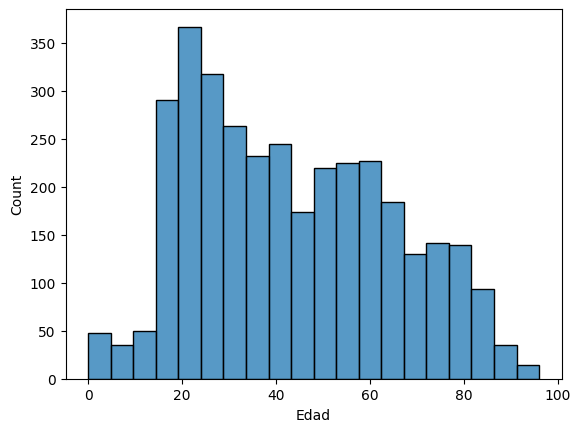

In [12]:
sns.histplot(data=df, x="Edad",bins=20)


In [14]:
# Agrupar por 'Sexo' y contar la cantidad de fallecidos
fallecidos_por_sexo = df.groupby('Sexo')['Fallecidos'].sum()

print(fallecidos_por_sexo)

# Obtener la cantidad de fallecidos para cada sexo
fallecidos_mujeres = fallecidos_por_sexo.get('F', 0)
fallecidos_hombres = fallecidos_por_sexo.get('M', 0)

# Calcular el ratio
if fallecidos_mujeres > 0 and fallecidos_hombres > 0:
    ratio = fallecidos_hombres / fallecidos_mujeres
    print(f"Por cada fallecimiento de una mujer, mueren {ratio:.2f} hombres")
else:
    print("No hay suficientes datos para calcular el ratio")

Sexo
F     809
M    2624
Name: Fallecidos, dtype: int64
Por cada fallecimiento de una mujer, mueren 3.24 hombres


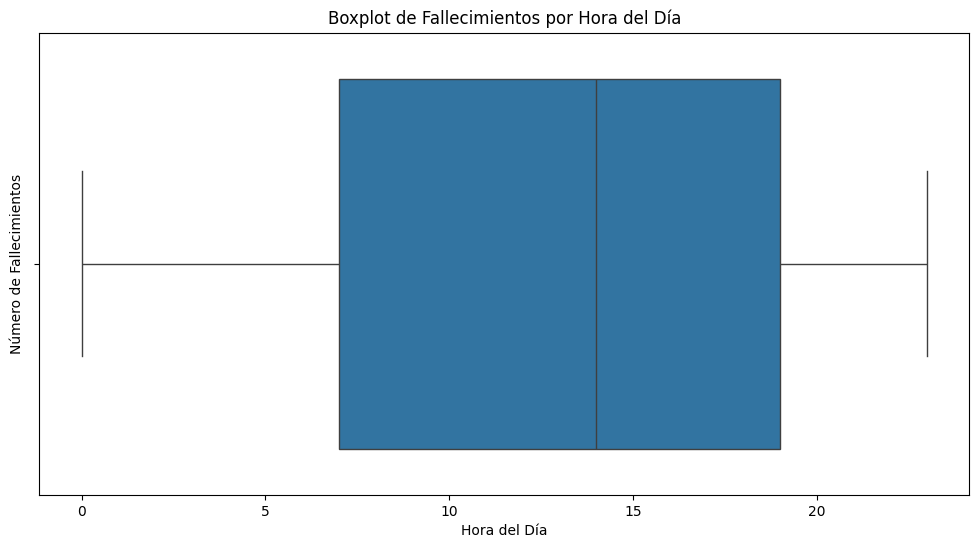

In [37]:

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='hora', data=df)
plt.xlabel('Hora del Día')
plt.ylabel('Número de Fallecimientos')
plt.title('Boxplot de Fallecimientos por Hora del Día')
plt.show()

In [35]:
# Con los siguientes datos podemos concluir que:
# 1) Los hombres son el principal protagonista de los fallecimientos
# 2) El departamento más afectado por los fallecimientos es Montevideo (dada la cantidad de gente y trafico era esperable)
# 3) El vehículo con más fallecimientos es la Moto
# 4) La colisión entre vehículos es la causa que más ingerencia tiene, seguido de 'Despiste'
# 5) La edad promedio de fallecidos es de 43 años
# 6) Vemos que, en promedio, por cada fallecimiento de una mujer, mueren 3.24 hombres